<a href="https://colab.research.google.com/github/nmshafie1993/detect_yoga_pose/blob/master/Yoga_pose_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
#loading the Libraries
import math, re, os
import numpy as np
import pandas as pd
import tensorflow as tf
import pathlib
import PIL
import matplotlib.pyplot as plt
from IPython.display import Image
import cv2
from tensorflow.keras.preprocessing import image_dataset_from_directory, image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
import tensorflow.keras.layers.experimental.preprocessing as preprocessing
import shutil

print("Tensorflow version " + tf.__version__)

Tensorflow version 2.4.1


In [ ]:
shutil.rmtree('/content/detect_yoga_pose')

In [2]:
#cloning the data from github
!git clone "https://github.com/nmshafie1993/detect_yoga_pose.git"

Cloning into 'detect_yoga_pose'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 1276 (delta 26), reused 43 (delta 15), pack-reused 1204
Receiving objects: 100% (1276/1276), 137.47 MiB | 18.54 MiB/s, done.
Resolving deltas: 100% (171/171), done.


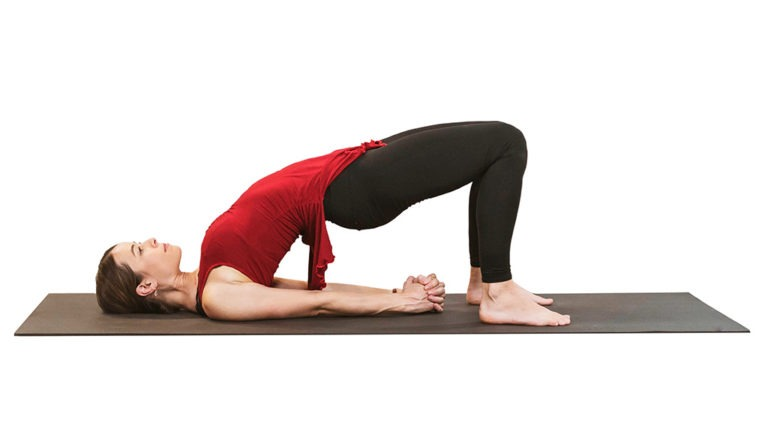

In [6]:
Image(filename='/content/detect_yoga_pose/Train_Set/bridge/1.jpg', width = 224, height=224)

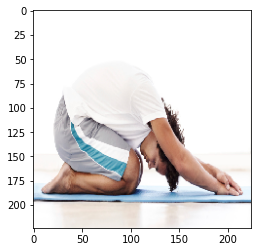

In [19]:
img = image.load_img('/content/detect_yoga_pose/Train_Set/childs/2.jpg', target_size = (224, 224))
plt.imshow(img);

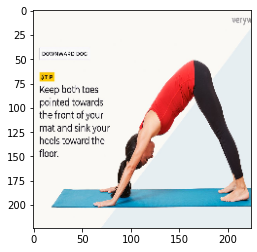

In [20]:
img_2 = cv2.imread('/content/detect_yoga_pose/Train_Set/downwarddog/3.jpg')
img_2 = cv2.resize(img_2, (224,224))
plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB));

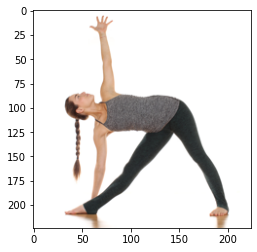

In [22]:
img_3 = PIL.Image.open('/content/detect_yoga_pose/Train_Set/trianglepose/3.jpg')
img_3 = img_3.resize((224,224))
plt.imshow(img_3);

In [35]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   brightness_range=(0.2, 0.8),
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [46]:
training_set = train_datagen.flow_from_directory(
    '/content/detect_yoga_pose/Train_Set',
    #color_mode = 'grayscale',
    #classes='inferred',
    class_mode='categorical',
    target_size=(224, 224),
    #interpolation='nearest',
    batch_size=64,
    #shuffle=True,
)
validation_set = test_datagen.flow_from_directory(
    '/content/detect_yoga_pose/Valid_Set',
    #color_mode = 'grayscale',
    #labels='inferred',
    class_mode='categorical',
    target_size=(224, 224),
    #interpolation='nearest',
    batch_size=64,
    #shuffle=False,
)
test_set = test_datagen.flow_from_directory(
    '/content/detect_yoga_pose/Test_Set',
    #color_mode = 'grayscale',
    #labels='inferred',
    class_mode='categorical',
    target_size=(224, 224),
    #interpolation='nearest',
    batch_size=64,
    #shuffle=False,
)

Found 837 images belonging to 4 classes.
Found 40 images belonging to 4 classes.
Found 41 images belonging to 4 classes.


In [49]:
from keras.models import Sequential
model = Sequential([
        Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = (224,224,3)),
        MaxPool2D(pool_size = (2,2), strides = 2),
        Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'),
        MaxPool2D(pool_size = (2,2), strides = 2),
        Dropout(0.2),
        Flatten(),
        Dense(units =128, activation = 'relu'),
        Dense(units =4, activation = 'softmax'),
        
])

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [51]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer = Adam (learning_rate = 0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])
history = model.fit(x = training_set, 
          validation_data = validation_set, epochs = 30, 
          verbose = 2)


Epoch 1/30
14/14 - 28s - loss: 1.4762 - accuracy: 0.2939 - val_loss: 1.5114 - val_accuracy: 0.2250
Epoch 2/30
14/14 - 22s - loss: 1.3553 - accuracy: 0.3513 - val_loss: 1.3695 - val_accuracy: 0.3750
Epoch 3/30
14/14 - 22s - loss: 1.3271 - accuracy: 0.3847 - val_loss: 1.3424 - val_accuracy: 0.3250
Epoch 4/30
14/14 - 22s - loss: 1.2658 - accuracy: 0.4468 - val_loss: 1.3265 - val_accuracy: 0.4250
Epoch 5/30
14/14 - 22s - loss: 1.2044 - accuracy: 0.5125 - val_loss: 1.3661 - val_accuracy: 0.3500
Epoch 6/30
14/14 - 22s - loss: 1.1823 - accuracy: 0.5233 - val_loss: 1.5648 - val_accuracy: 0.4000
Epoch 7/30
14/14 - 22s - loss: 1.1380 - accuracy: 0.5568 - val_loss: 1.4116 - val_accuracy: 0.3500
Epoch 8/30
14/14 - 22s - loss: 1.1072 - accuracy: 0.5388 - val_loss: 1.4815 - val_accuracy: 0.4000
Epoch 9/30
14/14 - 22s - loss: 1.0618 - accuracy: 0.5926 - val_loss: 1.4154 - val_accuracy: 0.4000
Epoch 10/30
14/14 - 22s - loss: 1.0489 - accuracy: 0.5914 - val_loss: 1.5103 - val_accuracy: 0.4500
Epoch 11/

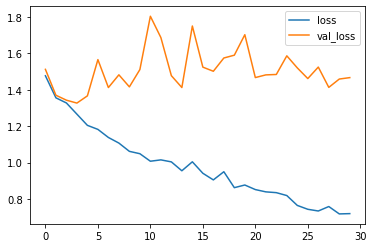

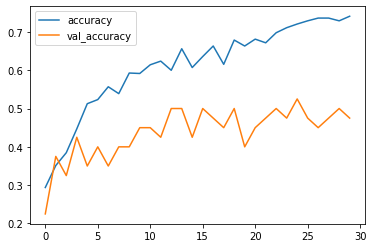

In [52]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [ ]:
predictions = model.predict (x = ds_test, verbose = 0)

In [ ]:
np.round(predictions)

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],


In [ ]:
for image, label in ds_test_:
  print(label)

tf.Tensor(
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]], shape=(41, 4), dtype=float32)


In [ ]:
cm = confusion_matrix(y_true = test_batches.classes, y_pred = np.argmax(predictions, axis = -1))

This image most likely belongs to childs with a 34.08 percent confidence.


**Transfer Learning**